In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [107]:
def monte_carlo_simulation(s, a, b, pity_s, guarantee, amount):
    char_result = []
    roll_to_limited_s = []
    rng_result = []
    # base probability
    total_gacha = s+a+b
    prob_s = s/total_gacha
    prob_a = a/total_gacha
    prob_b = b/total_gacha
    prob_guarantee_s = 0.5
    
    # hitung probabilitas kumulatif
    cum_prob_s = prob_s
    cum_prob_a = cum_prob_s + prob_a
    cum_prob_b = cum_prob_a + prob_b
    
    # track the amount of character
    count_standard_s = 0
    count_limited_s = 0
    count_a = 0
    count_b = 0
    
    # pity system
    pity_s = pity_s
    pity_a = 0
    # pity counter
    count_pity_s = 0
    count_pity_a = 0
    
    # check guarantee
    is_guarantee = guarantee
    
    # looping
    for i in range(amount):
        # random number
        roll = random.random()
        
        if pity_s >= 89:
            pity_s = 0
            pity_a = 0
            count_pity_s += 1
            if is_guarantee:
                count_limited_s += 1
                char_result.append('LS')
                roll_to_limited_s.append(i+1)
                is_guarantee = False
            else:
                if random.random() < prob_guarantee_s:
                    count_limited_s += 1
                    char_result.append('LS')
                    roll_to_limited_s.append(i+1)
                else:
                    count_standard_s += 1
                    char_result.append('S')
                    is_guarantee = True
        else:
            if roll < cum_prob_s:
                pity_s = 0
                pity_a = 0
                if is_guarantee:
                    count_limited_s += 1
                    char_result.append('LS')
                    roll_to_limited_s.append(i+1)
                    is_guarantee = False
                else:
                    if random.random() < prob_guarantee_s:
                        count_limited_s += 1
                        char_result.append('LS')
                        roll_to_limited_s.append(i+1)
                    else:
                        count_standard_s += 1
                        char_result.append('S')
                        is_guarantee = True
            elif roll < cum_prob_a:
                count_a += 1
                pity_s += 1
                pity_a = 0
                char_result.append('A')
            else:
                if pity_a >= 9:
                    count_a += 1
                    pity_s += 1
                    pity_a = 0
                    count_pity_a += 1
                    char_result.append('A')
                else:
                    count_b += 1
                    pity_s += 1
                    pity_a += 1
                    char_result.append('B')
        rng_result.append(roll)
    
    # summary
    print('Base Probabilty Karakter')
    print(f'probability S: {prob_s:.5f}\nprobability A: {prob_a:.5f}\nprobability B: {prob_b:.5f}')
    print(f'\nProbabilitas Kumulatif')
    print(f'Probabilitas S: {cum_prob_s:.5f}\nProbabilitas A: {cum_prob_a:.5f}\nProbabilitas B: {cum_prob_b:.5f}')
    
        
    
    return rng_result, char_result, roll_to_limited_s, count_limited_s, count_standard_s, count_a, count_b

## Input History Data

In [155]:
# Input gacha history
S_char = 5
A_char = 41
B_char = 255
# state awal
pity_awal = 11
guarantee = True
total_sim = 1000000

roll_cost = 160

#jika pity awal 90 maka reset jadi 0 jika melebihi 90 maka sisa dibagi 90
pity_awal = pity_awal if pity_awal < 90 else pity_awal%90
print(f'pity awal : {pity_awal}')

pity awal : 11


## Jalankan Simulasi

In [156]:
rng_result, char_result, roll_to_limited_s, count_limited_s, count_standart_s, count_a, count_b = monte_carlo_simulation(S_char, A_char, B_char, pity_awal, guarantee, total_sim)

Base Probabilty Karakter
probability S: 0.01661
probability A: 0.13621
probability B: 0.84718

Probabilitas Kumulatif
Probabilitas S: 0.01661
Probabilitas A: 0.15282
Probabilitas B: 1.00000


## Hasil Simulasi

In [157]:
#jumlah total karakter S
count_s = count_limited_s + count_standart_s
#probabilitas karakter
prob_limited_s = count_limited_s/total_sim
prob_s = count_s/total_sim
prob_a = count_a/total_sim
prob_b = count_b/total_sim

print(f'Hasil simulasi setelah {total_sim} kali pull')

print(f'\nJumlah karakter\n---------------------')
print(f'Limited S: {count_limited_s}')
print(f'S: {count_s}')
print(f'A: {count_a}')
print(f'B: {count_b}')

print(f'\nProbabilitas karakter \n---------------------')
print(f'Limited S: {prob_limited_s*100:.2f}%')
print(f'S: {prob_s*100:.2f}%')
print(f'A: {prob_a*100:.2f}%')
print(f'B: {prob_b*100:.2f}%')

Hasil simulasi setelah 1000000 kali pull

Jumlah karakter
---------------------
Limited S: 14269
S: 21410
A: 169815
B: 808775

Probabilitas karakter 
---------------------
Limited S: 1.43%
S: 2.14%
A: 16.98%
B: 80.88%


### Karakter S in General

In [158]:
# average pull needed (ditambah 1 karena index mulai dari 0)
rolls_to_get_s = [index + 1 for index, char in enumerate(char_result) if char == 'S' or char == 'LS']
print(f'Rolls at which character S was obtained: {rolls_to_get_s}')

first_roll = rolls_to_get_s[0]+pity_awal
interval_rolls_to_s = [first_roll] + [rolls_to_get_s[i] - rolls_to_get_s[i-1] for i in range(1, len(rolls_to_get_s))]

print(f'Rolls to get character S: {interval_rolls_to_s}')

print(f'\n\nSummary\n---------------------')
average_s = np.mean(interval_rolls_to_s)
print(f'Average rolls to get character S: {average_s:.1f} Pulls')
print(f'Average cost to get character S: {average_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
pull_needed = average_s - pity_awal 
print(f'Pull needed to get the character based on pity awal : {pull_needed:.0f} Pulls')
print(f'Cost needed to get limited character S: {pull_needed*roll_cost:.0f} Polychromes')


amount_pity_s = interval_rolls_to_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky: {(amount_pity_s/total_sim)*100:.3f}%')

Rolls at which character S was obtained: [79, 96, 186, 197, 203, 286, 351, 441, 522, 557, 616, 626, 690, 694, 784, 817, 907, 927, 938, 989, 1079, 1088, 1104, 1176, 1266, 1356, 1385, 1440, 1487, 1577, 1621, 1663, 1688, 1709, 1753, 1843, 1846, 1854, 1942, 1969, 1971, 2013, 2095, 2144, 2234, 2282, 2283, 2316, 2331, 2373, 2443, 2500, 2507, 2590, 2604, 2694, 2752, 2842, 2884, 2904, 2940, 2944, 2972, 3002, 3092, 3176, 3217, 3233, 3284, 3288, 3378, 3416, 3494, 3499, 3557, 3591, 3621, 3683, 3714, 3744, 3751, 3769, 3787, 3807, 3832, 3839, 3929, 4019, 4041, 4075, 4097, 4121, 4167, 4184, 4274, 4288, 4327, 4332, 4386, 4453, 4470, 4485, 4535, 4606, 4668, 4711, 4743, 4797, 4871, 4961, 4978, 5068, 5129, 5219, 5232, 5247, 5290, 5380, 5461, 5508, 5520, 5539, 5560, 5650, 5677, 5767, 5779, 5819, 5889, 5906, 5956, 5960, 5981, 6071, 6136, 6226, 6299, 6313, 6380, 6381, 6386, 6434, 6524, 6602, 6636, 6705, 6795, 6811, 6837, 6863, 6908, 6914, 6930, 7020, 7035, 7125, 7215, 7248, 7338, 7391, 7393, 7477, 7567, 76

### Karakter Limited S

In [159]:
print(roll_to_limited_s)
#Check if got limited character S first
#Kalo gadapet limited duluan gaperlu ditambah dg pity awal
first_roll = roll_to_limited_s[0] if rolls_to_get_s[0]<roll_to_limited_s[0] else roll_to_limited_s[0] + pity_awal

interval_limited_s = [first_roll] + [roll_to_limited_s[i] - roll_to_limited_s[i-1] for i in range(1, len(roll_to_limited_s))]
print(f'\nRolls at which limited character S was obtained: \n{interval_limited_s}')

print(f'\n\nSummary\n---------------------')
average_limited_s = np.mean(interval_limited_s)
print(f'Average rolls to get limited character S: {average_limited_s:.1f} Pulls')
print(f'Average cost to get limited character S: {average_limited_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
print(f'Pull needed to get the character based on pity awal : {average_limited_s - pity_awal:.0f} Pulls')
print(f'Cost needed to get limited character S: {(average_limited_s - pity_awal)*roll_cost:.0f} Polychromes')

#pity counter
amount_pity_s = interval_limited_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky {(amount_pity_s/total_sim)*100:.3f}%')

[79, 186, 197, 286, 351, 441, 557, 616, 690, 784, 907, 938, 1079, 1104, 1266, 1385, 1487, 1577, 1621, 1663, 1688, 1709, 1843, 1854, 1969, 1971, 2095, 2144, 2282, 2283, 2316, 2373, 2500, 2507, 2604, 2694, 2752, 2884, 2904, 2940, 2972, 3092, 3176, 3233, 3284, 3378, 3416, 3494, 3557, 3621, 3683, 3744, 3769, 3787, 3832, 3839, 4019, 4075, 4097, 4121, 4167, 4184, 4288, 4327, 4332, 4386, 4453, 4485, 4535, 4606, 4711, 4797, 4871, 4978, 5068, 5129, 5219, 5232, 5290, 5380, 5461, 5520, 5560, 5677, 5767, 5779, 5889, 5956, 5960, 5981, 6071, 6136, 6226, 6313, 6381, 6386, 6434, 6524, 6602, 6636, 6705, 6811, 6863, 6914, 6930, 7020, 7035, 7125, 7248, 7391, 7393, 7567, 7701, 7812, 7823, 7893, 7983, 8052, 8138, 8147, 8158, 8303, 8328, 8361, 8366, 8445, 8608, 8664, 8692, 8726, 8806, 8896, 8949, 9008, 9070, 9210, 9258, 9348, 9515, 9571, 9733, 9781, 9794, 9867, 9969, 10059, 10126, 10257, 10347, 10400, 10491, 10541, 10589, 10629, 10633, 10646, 10718, 10775, 10778, 10802, 10838, 10921, 10938, 11004, 11142, 11

## Tabel

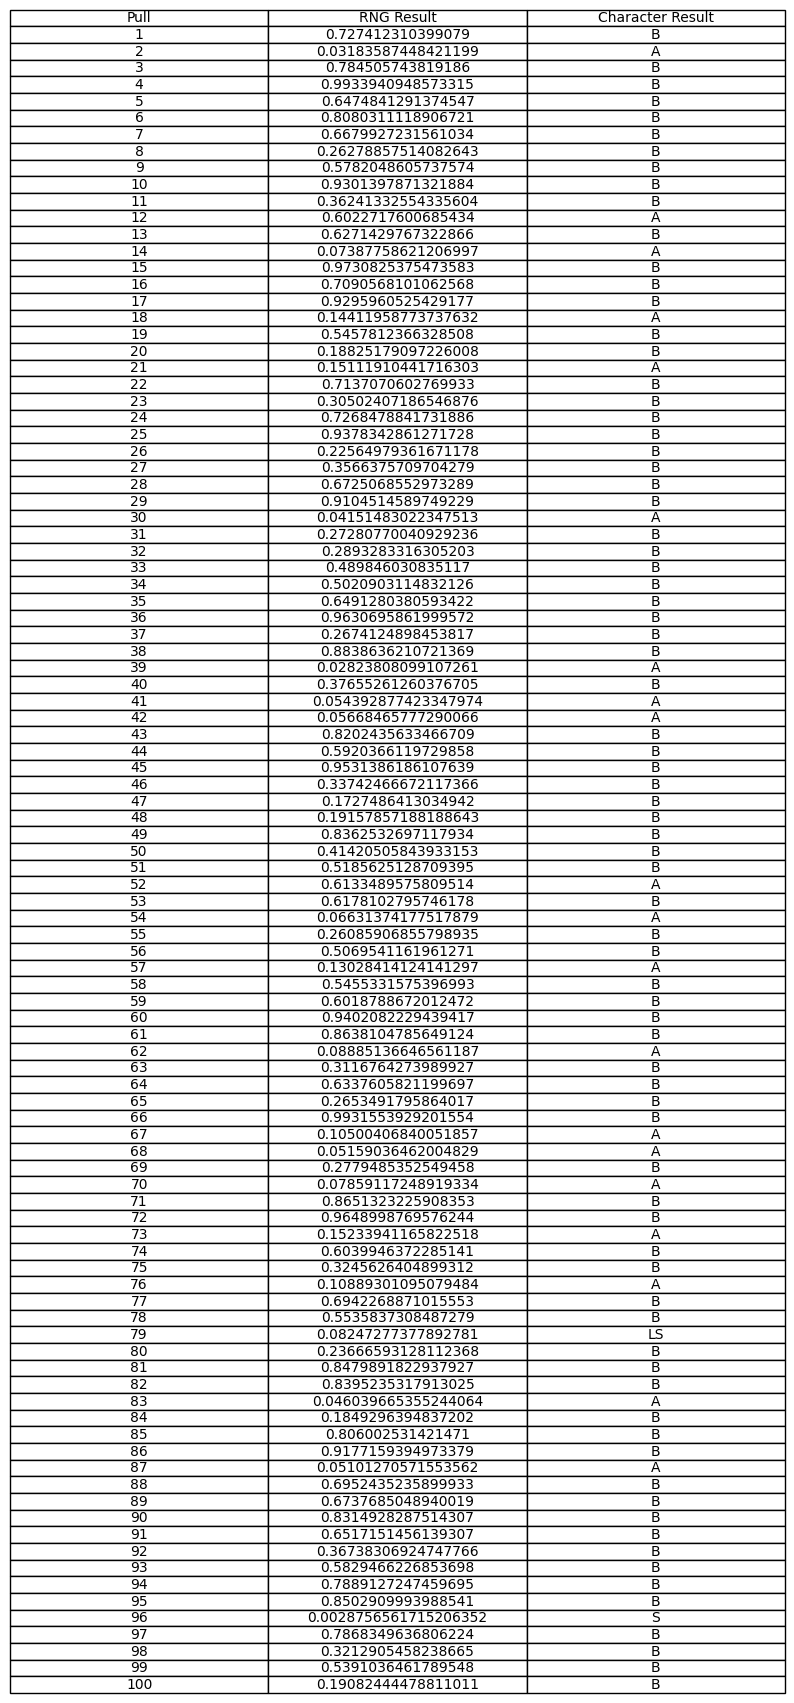

In [160]:
data = {
    'Pull': range(1, total_sim + 1),
    'RNG Result': rng_result,
    'Character Result': char_result
}

df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.head(100).values, colLabels=df.columns, cellLoc='center', loc='center')

plt.show()